In [3]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = '/global/homes/e/ecastori/PostBorn/'
data = np.loadtxt(path+'FFT_k-1Pk.dat',skiprows=2)

#----------------------#
n         = data[:,0]
Re_c_n    = data[:,1]
Im_c_n    = data[:,2]
Re_nu_n   = data[:,3]
Im_nu_n   = data[:,4]
#----------------------#

c_n  = Re_c_n  + 1j * Im_c_n
nu_n = Re_nu_n + 1j * Im_nu_n

data = np.loadtxt(path+'GG_weights.dat',skiprows=2)
t1   = data[:,0]
w1   = data[:,1]

In [5]:
path = '../PostBornEma/'
data =  np.load(path+'Il_nu_t_new1-ell-nn-tt.npy')
ell       = data[:,0]
nn        = data[:,1]
tt        = data[:,2]
#----------------------#

data =  np.load(path+'Il_nu_t_new1-ReI-ImI.npy')
Re_I      = data[:,0]
Im_I      = data[:,1]
#----------------------#

I_ = Re_I + 1j * Im_I

In [7]:
print(np.allclose(np.unique(tt),t1))

True


In [8]:
#cosmology
h         = 0.6770
omega_cdm = 0.11923
omega_b   = 0.02247
Omega_b   = omega_b/h**2
Omega_cdm = omega_cdm/h**2
Omega_m   = Omega_b+Omega_cdm
ns        = 0.96824
A0        = 2.10732*10**(-9)

#dictionary for class
cosmo_dict={'h': h,
'omega_b' : omega_b,
'omega_cdm': omega_cdm,
'A_s'    : A0,
'n_s'    : ns,
'k_pivot' : 0.05}
print(cosmo_dict)

# speed of light
c      = 299792458./1000. # km/s

#prefactor for Cl_kk computation from Cl_dd
prefac = 1.5*Omega_m*(100.)**2/c**2 #without h

{'h': 0.677, 'omega_b': 0.02247, 'omega_cdm': 0.11923, 'A_s': 2.10732e-09, 'n_s': 0.96824, 'k_pivot': 0.05}


In [9]:
from classy import Class
cosmo = Class()
cosmo.set(cosmo_dict)
cosmo.compute()
cosmo_b               = cosmo.get_background()

class_z               = cosmo_b['z'][::-1]
class_chi             = cosmo_b['comov. dist.'][::-1]
class_D               = cosmo_b['gr.fac. D'][::-1]#/cosmo_b['gr.fac. D'][-1]

derivParams           = cosmo.get_current_derived_parameters(['z_rec'])
z_cmb                 = derivParams['z_rec']


from scipy.interpolate import interp1d
from scipy.interpolate import InterpolatedUnivariateSpline as ius
chi_z = interp1d(class_z,class_chi*h, bounds_error=False, fill_value=0)
z_chi = interp1d(class_chi*h,class_z, bounds_error=False, fill_value=0)   # Mpc/h
D_chi = interp1d(class_chi*h,class_D, bounds_error=False, fill_value=0)    # growth
D_z   = interp1d(class_z,class_D, bounds_error=False, fill_value=0)
# chi_cmb
chi_cmb = chi_z(z_cmb)

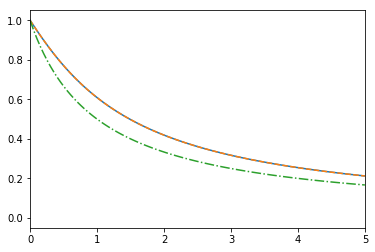

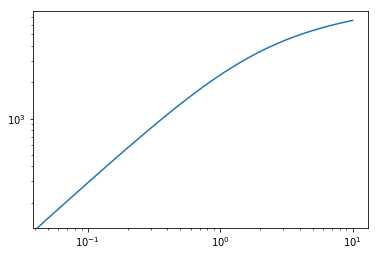

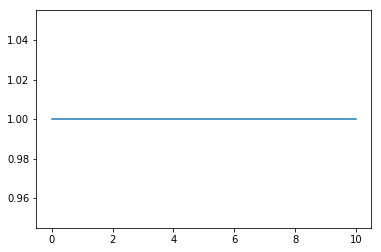

In [10]:
z = np.linspace(0,5,100)
plt.figure()
plt.plot(class_z,class_D,ls='-')
plt.plot(z,D_z(z),ls='--')
plt.plot(z,1/(1+z),ls='-.')
plt.xlim(0,5)
plt.show()

z=np.linspace(0.,10,200)
plt.figure()
plt.loglog(z,chi_z(z))
plt.show()
plt.figure()
plt.plot(z,D_z(z)/D_chi(chi_z(z)))
plt.show()

In [16]:
def set_kernel(chi_max):
    def kernel(chi):
        return (1.+z_chi(chi))*D_chi(chi)
    return kernel

D = set_kernel(chi_cmb)

In [12]:
ell_ = np.unique(ell)
nu_n_= np.unique(nu_n) 
t_=np.unique(tt)
assert(np.allclose(t_,t1))

print(nu_n_)
print(ell_)
print(np.unique(tt))
print(len(nu_n_),len(n),len(c_n),len(t_))
print(len(tt),len(I_))

[-1.9-27.94471j   -1.9-27.665263j  -1.9-27.385816j  -1.9-27.106369j
 -1.9-26.826921j  -1.9-26.547474j  -1.9-26.268027j  -1.9-25.98858j
 -1.9-25.709133j  -1.9-25.429686j  -1.9-25.150239j  -1.9-24.870792j
 -1.9-24.591345j  -1.9-24.311898j  -1.9-24.03245j   -1.9-23.753003j
 -1.9-23.473556j  -1.9-23.194109j  -1.9-22.914662j  -1.9-22.635215j
 -1.9-22.355768j  -1.9-22.076321j  -1.9-21.796874j  -1.9-21.517427j
 -1.9-21.237979j  -1.9-20.958532j  -1.9-20.679085j  -1.9-20.399638j
 -1.9-20.120191j  -1.9-19.840744j  -1.9-19.561297j  -1.9-19.28185j
 -1.9-19.002403j  -1.9-18.722956j  -1.9-18.443509j  -1.9-18.164061j
 -1.9-17.884614j  -1.9-17.605167j  -1.9-17.32572j   -1.9-17.046273j
 -1.9-16.766826j  -1.9-16.487379j  -1.9-16.207932j  -1.9-15.928485j
 -1.9-15.649038j  -1.9-15.36959j   -1.9-15.090143j  -1.9-14.810696j
 -1.9-14.531249j  -1.9-14.251802j  -1.9-13.972355j  -1.9-13.692908j
 -1.9-13.413461j  -1.9-13.134014j  -1.9-12.854567j  -1.9-12.575119j
 -1.9-12.295672j  -1.9-12.016225j  -1.9-11.736778j

In [13]:
m=0
I2D = np.zeros((len(ell_),len(nu_n_),len(t_),len(t_)),dtype=np.complex64)
for ii,ll in enumerate(ell_):
    for jj, nu in enumerate(nu_n_):
        I2D[ii][jj] = np.meshgrid(t_,I_[m:m+len(t_)])[1]
        m+=len(t_)

In [14]:
from scipy.integrate import simps, quadrature
from scipy.interpolate import interp1d
import time

In [17]:
r2d, t2d = np.meshgrid(t_,t_)
w11, w12 = np.meshgrid(w1,w1)
begin=time.time()
resultv=[]
for ii,ll in enumerate(ell_):
    if ii%20 ==0: print(ii)
    res1=[]
    for jj, nu in enumerate(nu_n_):
        #_, I2D = np.meshgrid(t_,I_array[ii,jj])
        integrand=(1.-r2d*t2d)/t2d*(1.-r2d)/r2d*I2D[ii][jj]*D(r2d*t2d*chi_cmb)*D(r2d*chi_cmb)*(r2d*chi_cmb)**(-nu)
        res1+=[np.sum(w11*w12*integrand)]
    resultv+=[np.real(np.sum(res1[0:-1]*c_n[0:-1]*2.)+res1[-1]*c_n[-1])]
print('Time taken = ', time.time()-begin)

Clv = np.real(np.asarray(resultv))*4./np.pi**2*prefac**2/4.

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
Time taken =  73.68954181671143


In [29]:
def Wkernel(xi, xmax):
    return (xmax - xi)/(xmax*xi) * (xmax > xi)


begin=time.time()

r2d, t2d = np.meshgrid(t_,t_)
w11, w12 = np.meshgrid(w1,w1)
I2D2     = np.swapaxes(I2D, 2, 3) #order of 'r' and 't' is confusing to me

result=[]

chi1fac0 = (Wkernel(r2d*chi_cmb, chi_cmb)*D(r2d*chi_cmb)).reshape(*r2d.shape, 1)
chi1fac0 = chi1fac0 *(r2d*chi_cmb).reshape(*r2d.shape, 1)**(1-nu_n_.reshape(1, 1, -1))

chi2fac00 = (Wkernel(t2d*r2d*chi_cmb, chi_cmb)*D(r2d*t2d*chi_cmb)).reshape(*r2d.shape, 1)
chi2fac01 = (Wkernel(1/t2d*r2d*chi_cmb, chi_cmb)*D(r2d*1/t2d*chi_cmb)).reshape(*r2d.shape, 1)
chi2fac01 = chi2fac01 * t2d.reshape(*r2d.shape, 1)**(nu_n_.reshape(1, 1, -1)-2)
chi2fac0  = chi2fac00 + chi2fac01
w11, w12  = w11.reshape(*w11.shape, 1), w12.reshape(*w12.shape, 1)

lmax = ell.size
for ii,ll in enumerate(ell_[:lmax]):
    if ii%20 ==0: print(ii) 
        
    res1 = np.sum(w11*w12*chi1fac0* chi2fac0*I2D2[ii].T, axis=(0, 1))
    
    result += [np.real(np.sum(res1[0:-1]*c_n[0:-1]*2.)+res1[-1]*c_n[-1])]
Cl3=chi_cmb * np.real(np.asarray(result))*4./np.pi**2*prefac**2/8.

print('Time taken = ', time.time()-begin)

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
Time taken =  5.020306587219238


In [30]:
def Wkernel(xi, xmax):
    return (xmax - xi)/(xmax*xi) * (xmax > xi)


r2d, t2d = np.meshgrid(t_,t_)
w11, w12 = np.meshgrid(w1,w1)
begin=time.time()
result=[]
for ii,ll in enumerate(ell_):
    if ii%20 ==0: print(ii)
    res1=[]
    for jj, nu in enumerate(nu_n_):
        #_, I2D = np.meshgrid(t_,I_array[ii,jj])
        ww = Wkernel(r2d*chi_cmb, chi_cmb) *Wkernel(r2d*t2d*chi_cmb, chi_cmb)
        integrand=ww*I2D[ii][jj]*D(r2d*t2d*chi_cmb)*D(r2d*chi_cmb)*(r2d*chi_cmb)**(1-nu)
        res1+=[np.sum(w11*w12*integrand)]
    result+=[np.real(np.sum(res1[0:-1]*c_n[0:-1]*2.)+res1[-1]*c_n[-1])]
print('Time taken = ', time.time()-begin)
Cl2=chi_cmb * np.real(np.asarray(result))*4./np.pi**2*prefac**2/4.

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
Time taken =  76.4144983291626


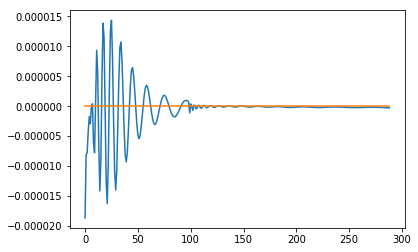

In [31]:
plt.figure()
plt.plot(Cl3/Clv-1)
plt.plot(Clv/Cl2-1)